In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Salary_Data.csv')

In [3]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
# mostrando as 5 primeiras linhas

df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
# mostrando as colunas do dataset

df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [6]:
# índice do dataset

df.index

RangeIndex(start=0, stop=30, step=1)

In [7]:
# mostrando o shape

df.shape

(30, 2)

In [8]:
# mostrando a quantidade de dados presentes no dataset

df.size

60

In [9]:
# infos do dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [10]:
# mostrando o tipo de dado de cada coluna

df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [11]:
# verificando se temos dados ausentes no dataset

df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Portanto, não temos dados ausentes

In [12]:
# estatísticas descritivas

df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [13]:
# calculando a matriz de correlação

df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [14]:
# calculando a matriz de covariância

df.cov()

,YearsExperience,Salary
YearsExperience,8.053609,7.610630e+04
Salary,76106.303448,7.515510e+08


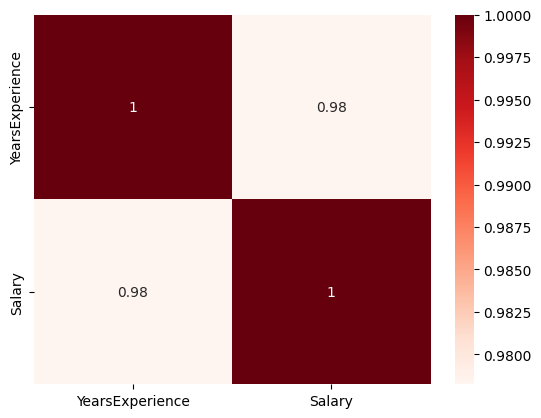

In [15]:
# mapa de calor com base na matriz de correlação

corr = df.corr()
sns.heatmap(
    data = corr,
    annot = True,
    cmap = 'Reds'
);

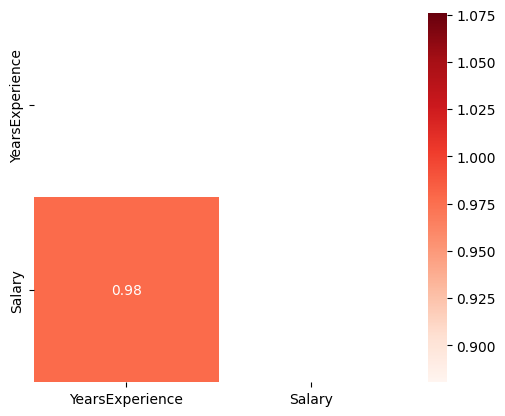

In [16]:
# mapa de calor resumido

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(
    data = corr,
    mask = mask,
    annot = True,
    cmap = 'Reds',
    square = True
);

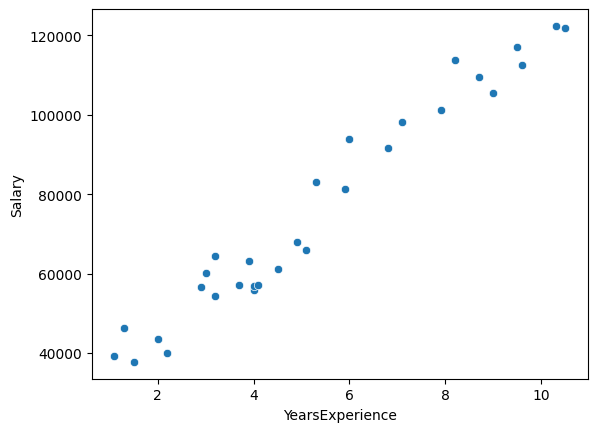

In [17]:
# plotando um gráfico scatterplot

sns.scatterplot(
    x = 'YearsExperience',
    y = 'Salary',
    data = df
);

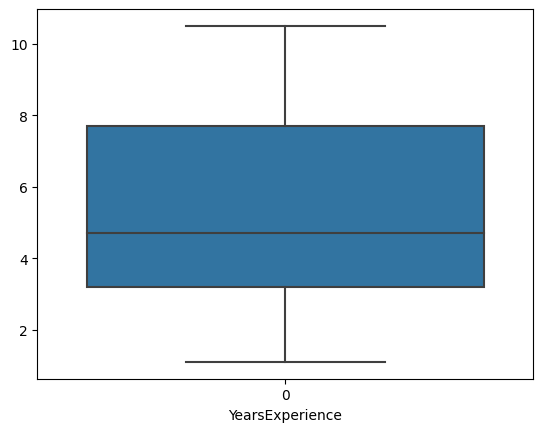

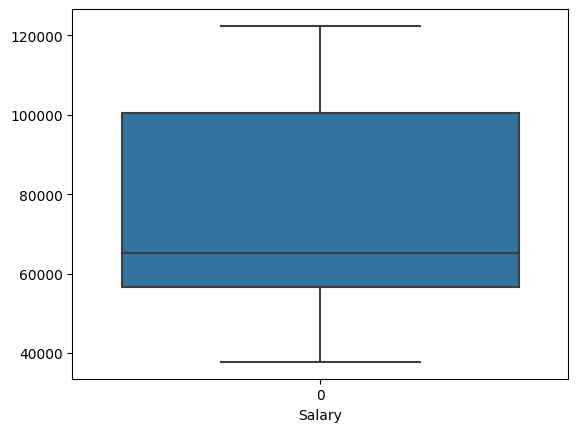

In [18]:
# gerando gráficos do tipo boxplot para cada variável

for column in df.columns:
  sns.boxplot(df[column])
  plt.xlabel(column)
  plt.show()
  print()

In [19]:
# definindo a variável target como salário e armazenando em outra variável

y = df['Salary'].values.reshape(-1,1)

In [20]:
y

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

In [21]:
# definindo as demais variáveis como preditoras e armazenando em outra variável

x = df['YearsExperience'].values.reshape(-1,1)

In [22]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [23]:
# separando o nosso banco de dados em bases de treino e teste

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, random_state = 7)

In [24]:
# verificando o shape dos vetores de treino e teste criados

x_treino.shape

(21, 1)

In [25]:
x_treino

array([[10.5],
       [ 4. ],
       [ 4.1],
       [ 5.1],
       [ 1.1],
       [10.3],
       [ 3. ],
       [ 9.5],
       [ 6.8],
       [ 3.9],
       [ 7.1],
       [ 3.2],
       [ 4.5],
       [ 3.2],
       [ 8.2],
       [ 6. ],
       [ 2. ],
       [ 7.9],
       [ 9. ],
       [ 2.2],
       [ 4.9]])

In [26]:
x_teste.shape

(9, 1)

In [27]:
x_teste

array([[1.5],
       [5.3],
       [1.3],
       [3.7],
       [4. ],
       [2.9],
       [5.9],
       [8.7],
       [9.6]])

In [28]:
y_treino.shape

(21, 1)

In [29]:
y_treino

array([[121872.],
       [ 56957.],
       [ 57081.],
       [ 66029.],
       [ 39343.],
       [122391.],
       [ 60150.],
       [116969.],
       [ 91738.],
       [ 63218.],
       [ 98273.],
       [ 64445.],
       [ 61111.],
       [ 54445.],
       [113812.],
       [ 93940.],
       [ 43525.],
       [101302.],
       [105582.],
       [ 39891.],
       [ 67938.]])

In [30]:
y_teste.shape

(9, 1)

In [31]:
y_teste

array([[ 37731.],
       [ 83088.],
       [ 46205.],
       [ 57189.],
       [ 55794.],
       [ 56642.],
       [ 81363.],
       [109431.],
       [112635.]])

In [32]:
# criando o modelo de Regressão Linear

from sklearn.linear_model import LinearRegression

modelo = LinearRegression()

In [33]:
# ajustando (fit) para os dados de treino

modelo.fit(x_treino, y_treino)

LinearRegression()

In [34]:
# calculando o coeficiente de determinação, passando os dados de teste para o modelo

modelo.score(x_teste, y_teste)

0.958816457461513

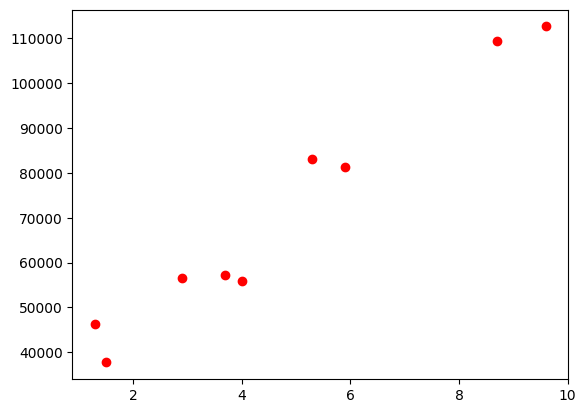

In [35]:
# gerando um gráfico com os dados de teste

plt.scatter(
    x = x_teste,
    y = y_teste,
    c = 'red'
);

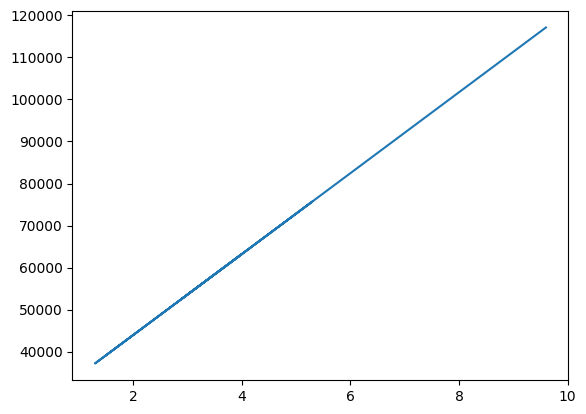

In [36]:
# agora, vamos plotar a reta de predição do nosso modelo

plt.plot(
    x_teste,
    modelo.predict(x_teste)
)

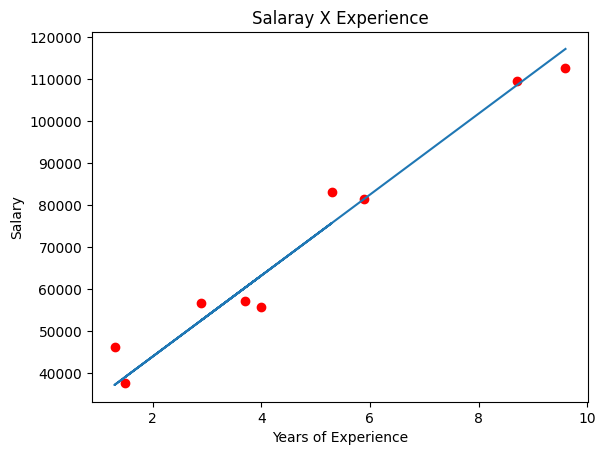

In [37]:
# para deixarmos os dois gráficos em um só

plt.scatter(x_teste, y_teste, c = 'red')
plt.plot(x_teste, modelo.predict(x_teste))
plt.title('Salaray X Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [38]:
# estimando o modelo utilizando o método OLS

import statsmodels.api as sm

y = df['Salary']
x = df['YearsExperience']

x = sm.add_constant(x)

modelo_OLS = sm.OLS(y, x)
resultados = modelo_OLS.fit()

In [39]:
resultados.params

const              25792.200199
YearsExperience     9449.962321
dtype: float64

In [41]:
resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 04 Sep 2023   Prob (F-statistic):           1.14e-20
Time:                        17:24:10   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

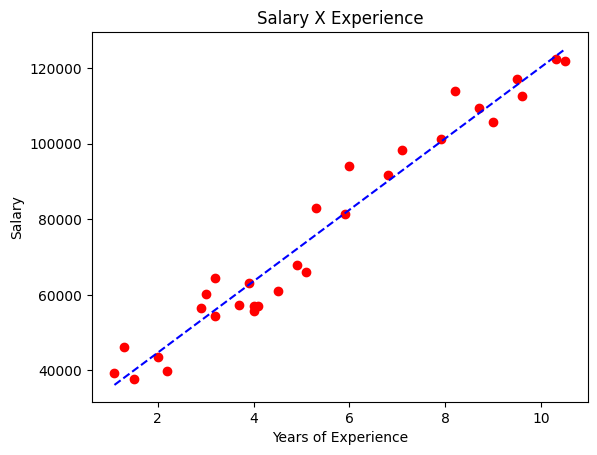

In [46]:
# equação da reta a partir dos resultados obtidos acima

y = [25790 + 9449.9623*i for i in df['YearsExperience']]

# plotando os pontos do data frame em vermelhor 'r'
plt.scatter(x = df['YearsExperience'], y = df['Salary'], c = 'r')
# plotando a reta obtida pela regressão linear com o método OLS em azul traçejado
plt.plot(df['YearsExperience'], y, c = 'b', ls = '--')

plt.title('Salary X Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()